In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, callbacks, optimizers

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Font tiếng Việt cho biểu đồ
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["axes.unicode_minus"] = False


2025-12-26 15:03:24.943098: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-26 15:03:24.943185: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-26 15:03:24.945198: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-26 15:03:24.962223: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-26 15:03:25.905186: W tensorflow/compiler/tf2

In [ ]:
# 1. LOAD PREPROCESSING PIPELINE

from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 25

DATA_DIR = "../data"
TRAIN_IMG_DIR = os.path.join(DATA_DIR, "train_images")

# Generator cho train
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2
)

# Generator cho validation
valid_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_IMG_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    seed=SEED,
    subset="training"
)

valid_generator = valid_datagen.flow_from_directory(
    TRAIN_IMG_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False,
    seed=SEED,
    subset="validation"
)

NUM_CLASSES = train_generator.num_classes
print("Số lớp bệnh:", NUM_CLASSES)


Found 8330 images belonging to 10 classes.
Found 2077 images belonging to 10 classes.
Số lớp bệnh: 10


In [ ]:
# 2. BUILD CNN MODEL

model = models.Sequential([
    layers.Input(shape=(*IMG_SIZE, 3)),

    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),

    layers.Dense(NUM_CLASSES, activation="softmax")
])

model.summary()


2025-12-26 15:03:29.929526: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-26 15:03:30.348442: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-26 15:03:30.348548: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-26 15:03:30.351754: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-26 15:03:30.351836: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 128)       0

In [ ]:
# 3. COMPILE MODEL

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
# 4. CALLBACKS & TRAINING

MODEL_PATH = "../models/cnn_person1_best.keras"

checkpoint_cb = callbacks.ModelCheckpoint(
    MODEL_PATH,
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

earlystop_cb = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=valid_generator,
    callbacks=[checkpoint_cb, earlystop_cb]
)


Epoch 1/25


2025-12-26 15:03:33.766456: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2025-12-26 15:03:34.225035: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-12-26 15:03:36.456363: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-12-26 15:03:37.180987: I external/local_xla/xla/service/service.cc:168] XLA service 0x77263d1a8230 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-26 15:03:37.181039: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro T2000, Compute Capability 7.5
2025-12-26 15:03:37.207925: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1766736217.348101    5032 device_compiler.h:186] Comp

261/261 [==============================] - ETA: 0s - loss: 2.1162 - accuracy: 0.2301
Epoch 1: val_accuracy improved from -inf to 0.33365, saving model to ../models/cnn_person1_best.keras
261/261 [==============================] - 240s 889ms/step - loss: 2.1162 - accuracy: 0.2301 - val_loss: 1.9043 - val_accuracy: 0.3337
Epoch 2/25
261/261 [==============================] - ETA: 0s - loss: 1.9376 - accuracy: 0.3283
Epoch 2: val_accuracy improved from 0.33365 to 0.37362, saving model to ../models/cnn_person1_best.keras
261/261 [==============================] - 183s 703ms/step - loss: 1.9376 - accuracy: 0.3283 - val_loss: 1.7945 - val_accuracy: 0.3736
Epoch 3/25
261/261 [==============================] - ETA: 0s - loss: 1.8344 - accuracy: 0.3648
Epoch 3: val_accuracy improved from 0.37362 to 0.40780, saving model to ../models/cnn_person1_best.keras
261/261 [==============================] - 172s 658ms/step - loss: 1.8344 - accuracy: 0.3648 - val_loss: 1.6851 - val_accuracy: 0.4078
Epoch 

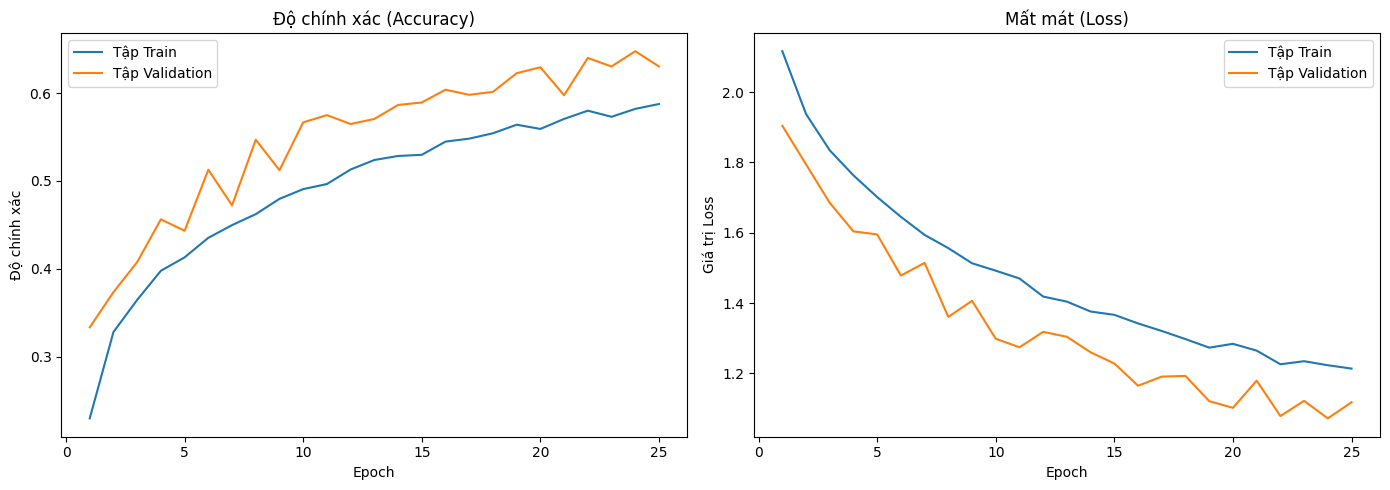

In [ ]:
# 5. TRAINING HISTORY PLOTS (VI)

history_dict = history.history

epochs_range = range(1, len(history_dict["accuracy"]) + 1)

plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history_dict["accuracy"], label="Tập Train")
plt.plot(epochs_range, history_dict["val_accuracy"], label="Tập Validation")
plt.title("Độ chính xác (Accuracy)")
plt.xlabel("Epoch")
plt.ylabel("Độ chính xác")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history_dict["loss"], label="Tập Train")
plt.plot(epochs_range, history_dict["val_loss"], label="Tập Validation")
plt.title("Mất mát (Loss)")
plt.xlabel("Epoch")
plt.ylabel("Giá trị Loss")
plt.legend()

plt.tight_layout()
plt.show()
